<a href="https://colab.research.google.com/github/g-e-mm/LinearRegressionwithSGD/blob/main/Linear_Regression_with_SGD_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Vehicle Performance Prediction**
**Abstract:**<br>
Most players in the automotive sector are investing in ML for their marketing efforts, a
much smaller group is putting in place incentives and key performance indicators<br>
(KPIs) to use more ML and automation. Closing the gap requires a stronger commitment
to developing ML capability that is not just useful but also used.<br><br>
**Problem Statement:**<br>
Use regression analysis to predict vehicle performance (mileage i.e kilometre travelled
per litre)


**Stochastic Gradient Descent**
* Stochastic Gradient Descent (SGD) is an optimization algorithm used to minimize the cost (or loss) function in machine learning models.
* It is an extension of the gradient descent algorithm, but instead of computing the gradient using the entire dataset, it computes it using a single random sample or a small batch of samples at each iteration.
* SGD is particularly useful when working with large datasets because it allows for faster convergence by updating the model parameters more frequently with smaller batches of data.
* The randomness in selecting samples or batches introduces noise into the optimization process, which can help escape local minima and lead to better generalization.
* However, the stochastic nature of SGD means that the optimization path may be more erratic compared to batch gradient descent, and convergence may not always be smooth.
* SGD requires tuning of hyperparameters such as the learning rate, batch size, and number of iterations to achieve optimal performance.
* Variants of SGD, such as mini-batch SGD and adaptive learning rate methods like AdaGrad, RMSprop, and Adam, address some of the limitations of basic SGD and further improve optimization efficiency.
* Despite its simplicity, SGD remains a popular choice for training machine learning models due to its efficiency, scalability, and effectiveness in handling large datasets.


**Steps involved**
1. Load the data and the libraries
2. Data preparation and data preprocessing
3. Data Visualization
4. Data Analysis
   1. Uni-Variate Analysis
   2. Bi-Variate (Correlation & Chi-Squared)
5. Training Linear Regression Model with SGD for prediction
6. Conclusion  

# Loading Data and Libraries

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score
from scipy.optimize import minimize
from scipy.stats import chi2_contingency
from sklearn.linear_model import LinearRegression

importing dataset [dataSGD](https://drive.google.com/file/d/1tB9aB-zI4o8_AXo09v2nyXQU9mSC2WdR/view?usp=sharing)

In [4]:
data = pd.read_csv("/content/SGDdata.csv")

# Data Preparation and Pre Processing

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   origin               398 non-null    int64  
 1   cylinders            398 non-null    int64  
 2   displacement         398 non-null    float64
 3   horsepower           398 non-null    object 
 4   weight               398 non-null    int64  
 5   acceleration         398 non-null    float64
 6   year                 398 non-null    int64  
 7   name                 398 non-null    object 
 8   Kilometer_per_liter  398 non-null    float64
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


we infer that there are no missing values

In [8]:
data.head()

,origin,cylinders,displacement,horsepower,weight,acceleration,year,name,Kilometer_per_liter
0,1,8,307.0,130,3504,12.0,1970,chevrolet chevelle malibu,7.652587
1,1,8,350.0,165,3693,11.5,1970,buick skylark 320,6.377156
2,1,8,318.0,150,3436,11.0,1970,plymouth satellite,7.652587
3,1,8,304.0,150,3433,12.0,1970,amc rebel sst,6.802299
4,1,8,302.0,140,3449,10.5,1970,ford torino,7.227443


In [7]:
data.describe()

,origin,cylinders,displacement,weight,acceleration,year,Kilometer_per_liter
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,1.572864,5.454774,193.425879,2970.424623,15.568090,1976.010050,9.997073
std,0.802055,1.701004,104.269838,846.841774,2.757689,3.697627,3.322917
min,1.000000,3.000000,68.000000,1613.000000,8.000000,1970.000000,3.826293
25%,1.000000,4.000000,104.250000,2223.750000,13.825000,1973.000000,7.440015
50%,1.000000,4.000000,148.500000,2803.500000,15.500000,1976.000000,9.778305
75%,2.000000,8.000000,262.000000,3608.000000,17.175000,1979.000000,12.329168
max,3.000000,8.000000,455.000000,5140.000000,24.800000,1982.000000,19.811697


In [10]:
data.drop ('name', axis=1, inplace=True)

In [11]:
data.head()

,origin,cylinders,displacement,horsepower,weight,acceleration,year,Kilometer_per_liter
0,1,8,307.0,130,3504,12.0,1970,7.652587
1,1,8,350.0,165,3693,11.5,1970,6.377156
2,1,8,318.0,150,3436,11.0,1970,7.652587
3,1,8,304.0,150,3433,12.0,1970,6.802299
4,1,8,302.0,140,3449,10.5,1970,7.227443


since name is not needed for the analysis, the choice to drop the name column has been made!

In [31]:
data[numerical_cols] = data[numerical_cols].replace('?', np.nan)

# Convert columns to numeric dtype
data[numerical_cols] = data[numerical_cols].astype(float)

#Data Visualization

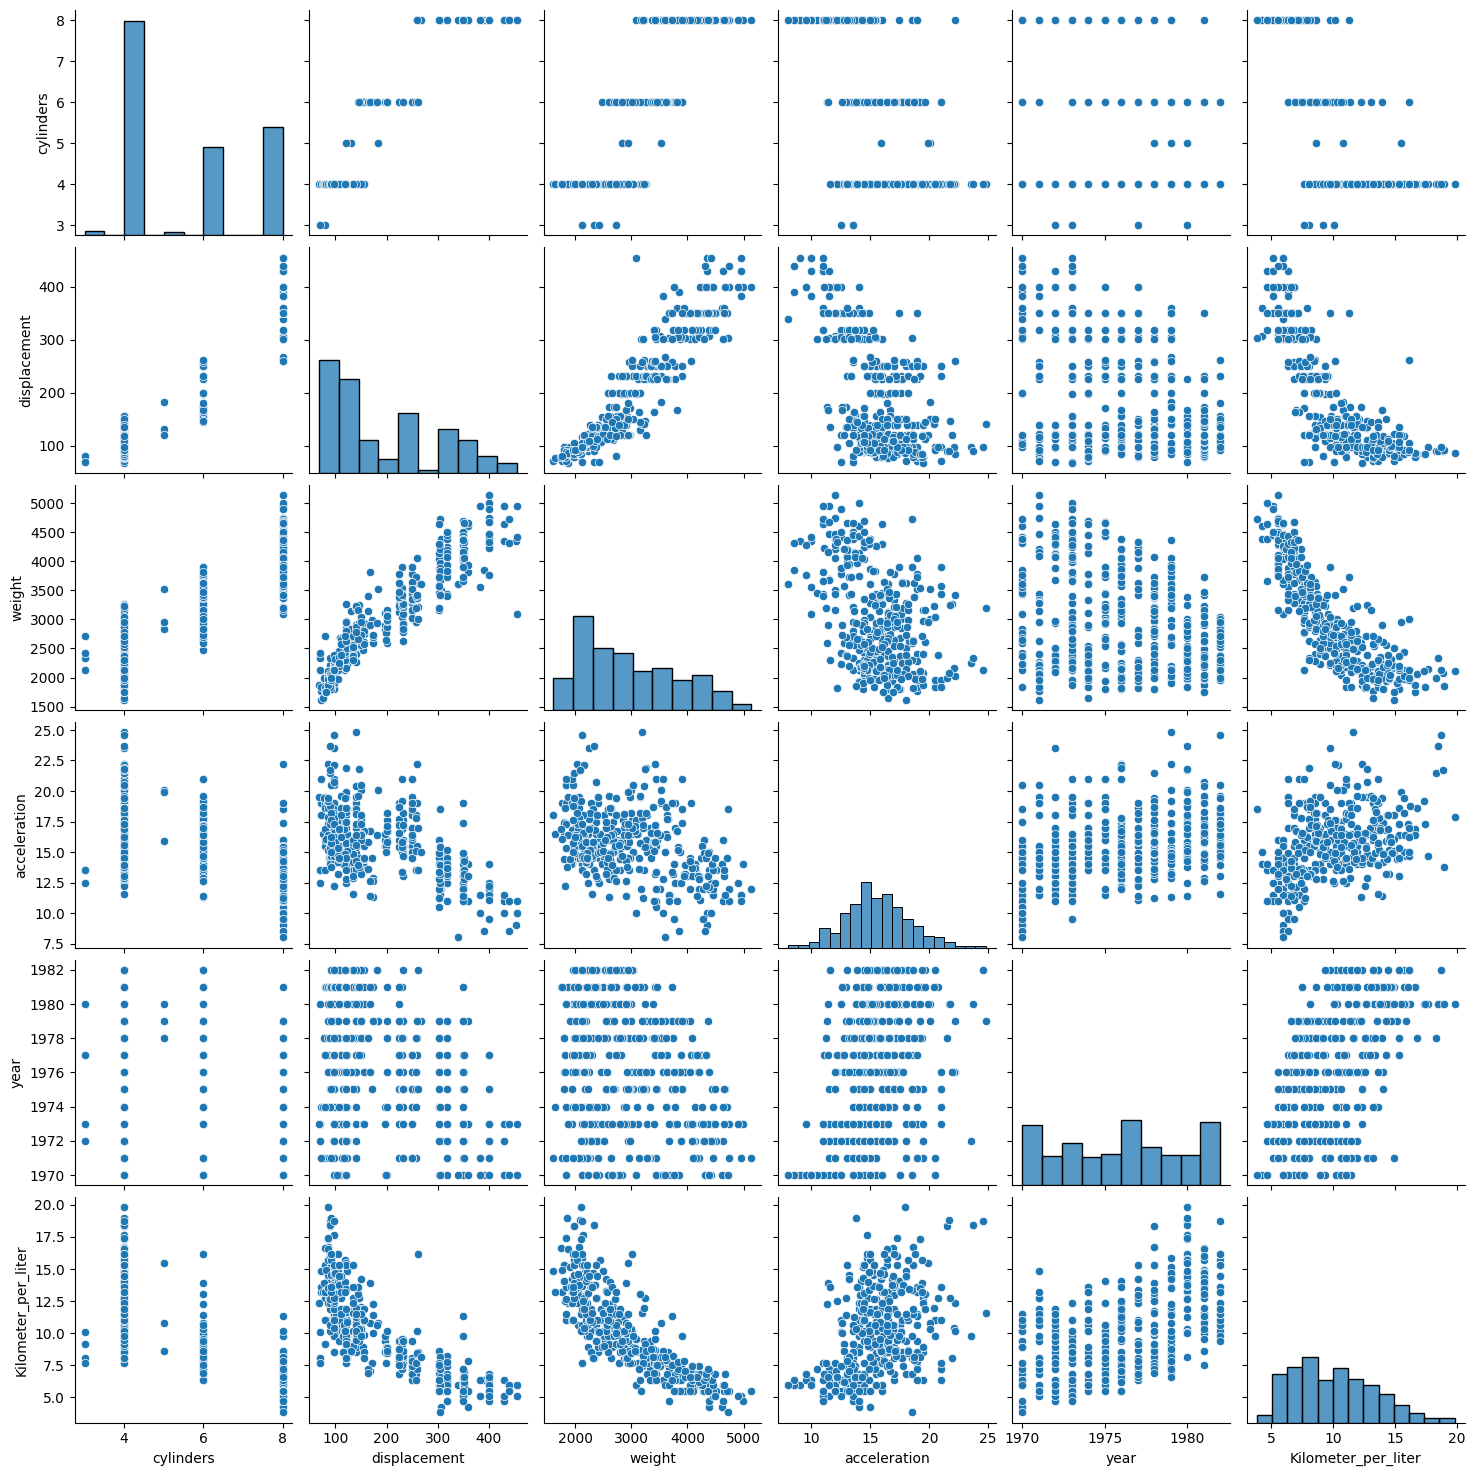

In [12]:
sns.pairplot(data[['cylinders','displacement',	'weight',	'acceleration',	'year',	'Kilometer_per_liter']])

* Pair Plots were made to identify significant pairs that seem to be correlated
* From the Pair Plots we find that Displacement, Weight (of the vehicle) and the accelaration have correlations
* There is low mileage of kmpl given with higher displacement and with increased weight of the vehicle.
* we can also infer that in the range of 10 km s^2 to 20 km s^2 there is more kmpl

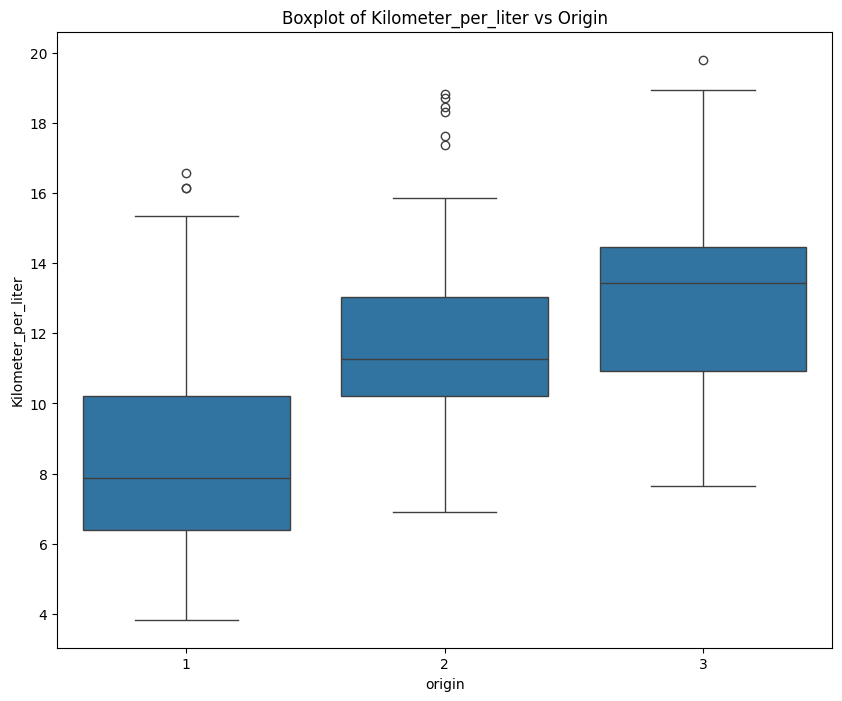

In [16]:
plt.figure(figsize=(10, 8))
sns.boxplot(x='origin', y='Kilometer_per_liter', data=data)
plt.title('Boxplot of Kilometer_per_liter vs Origin')
plt.show()

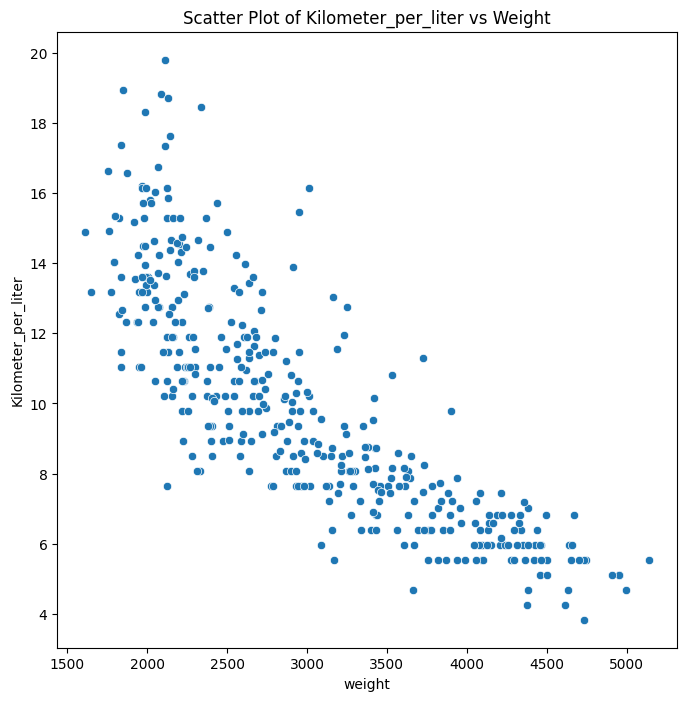

In [18]:
plt.figure(figsize=(8,8))
sns.scatterplot(x='weight', y='Kilometer_per_liter', data=data)
plt.title('Scatter Plot of Kilometer_per_liter vs Weight')
plt.show()

We can infer that with an increase in weight, the Kilometer_per_liter goes down

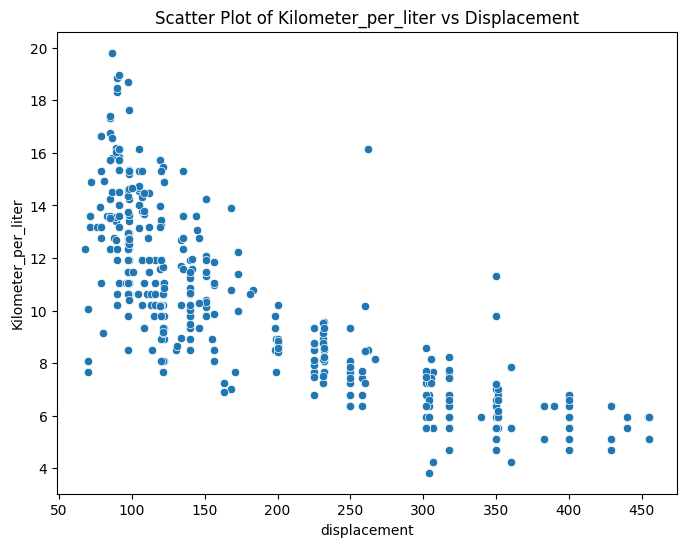

In [19]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='displacement', y='Kilometer_per_liter', data=data)
plt.title('Scatter Plot of Kilometer_per_liter vs Displacement')
plt.show()

We find higher Kilometer per Liter with less displacement

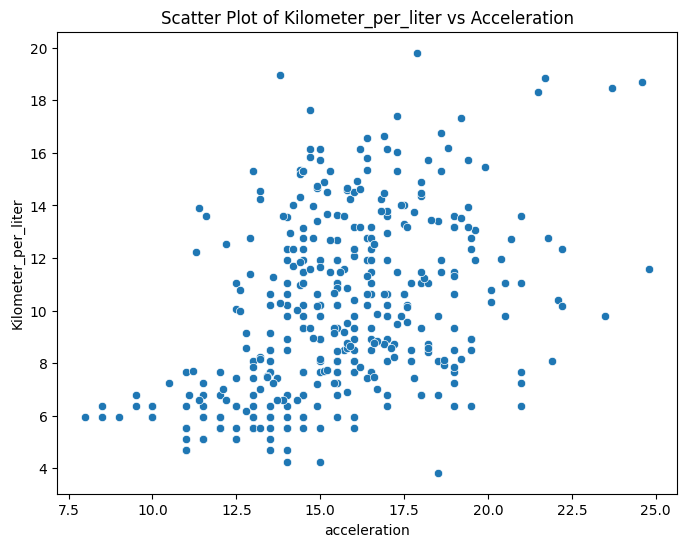

In [21]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='acceleration', y='Kilometer_per_liter', data=data)
plt.title('Scatter Plot of Kilometer_per_liter vs Acceleration')
plt.show()

We find that there Kilometer per liter is higher in the range [10,20]

# Data Analysis

## Univariate Analysis

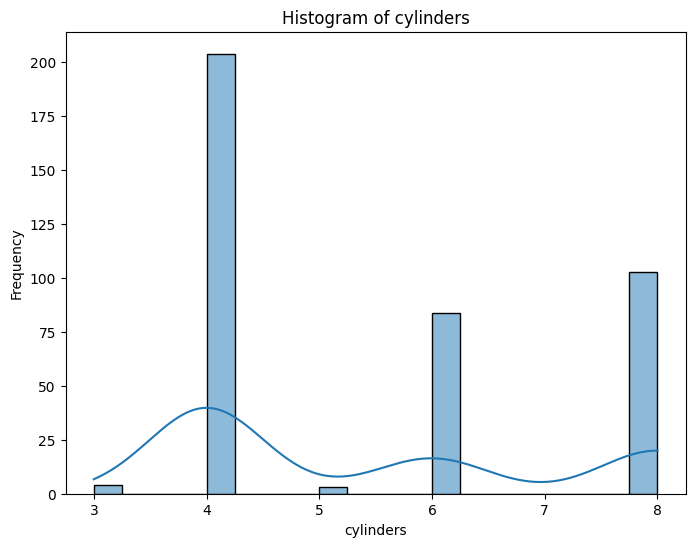

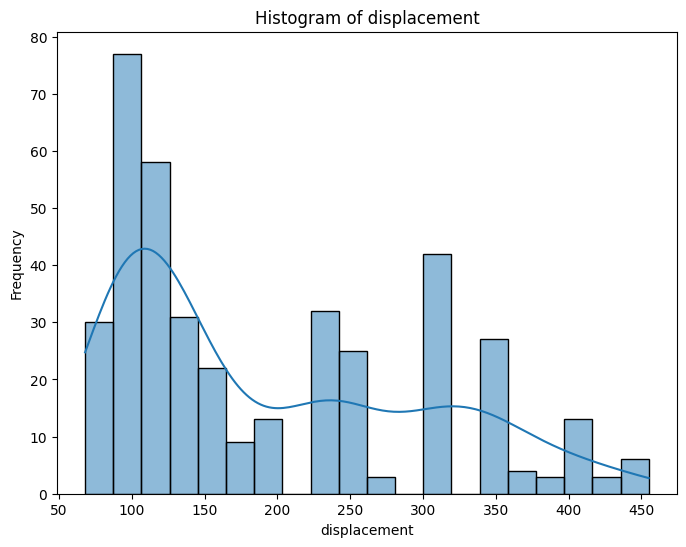

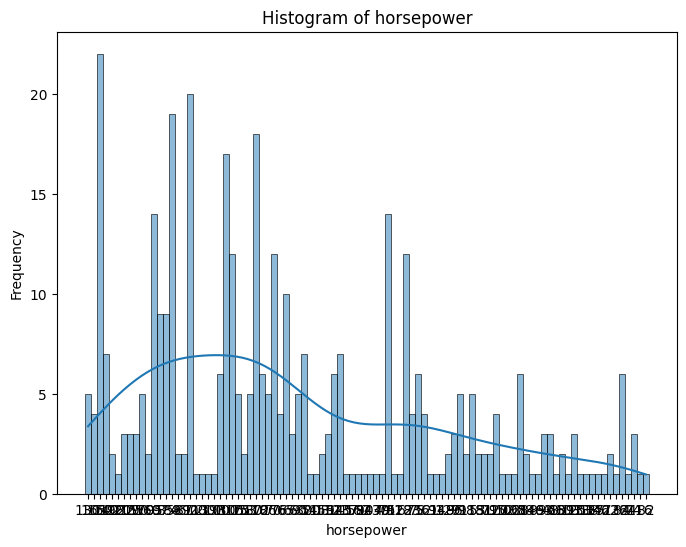

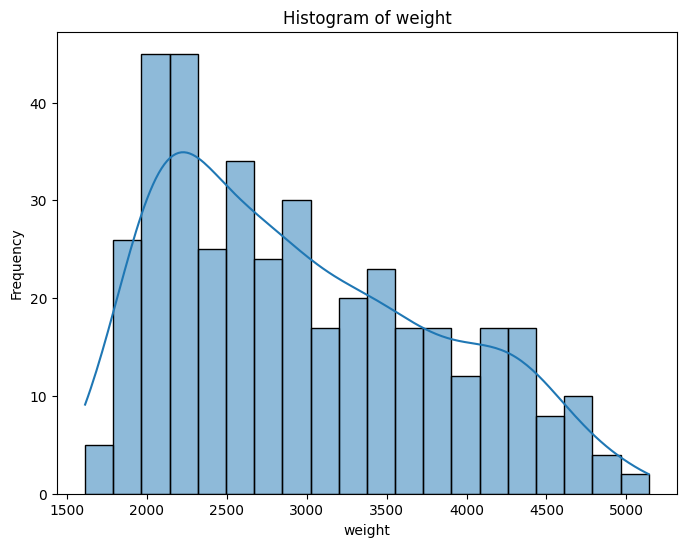

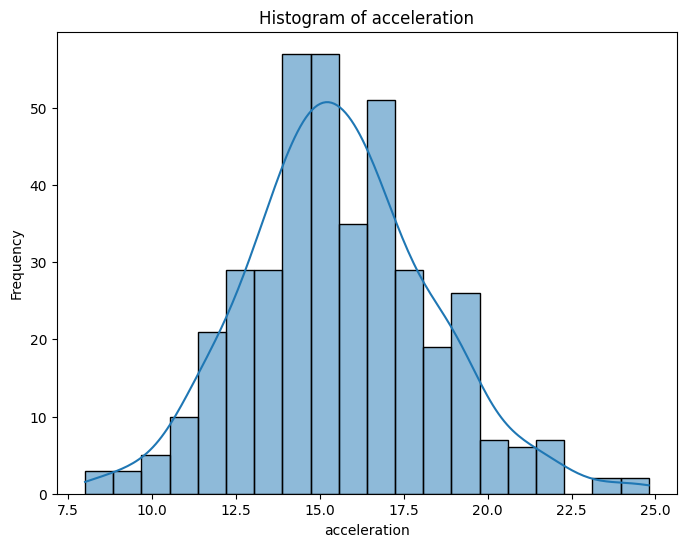

In [24]:
numerical_cols = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(data[col], bins=20, kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

## Bi-Variate Analysis

In [27]:
chi = chi2_contingency(pd.crosstab(data['origin'], data['cylinders']))
print("Chi-squared Test Result p-value:", chi[1])

Chi-squared Test Result p-value: 9.800693325588576e-35


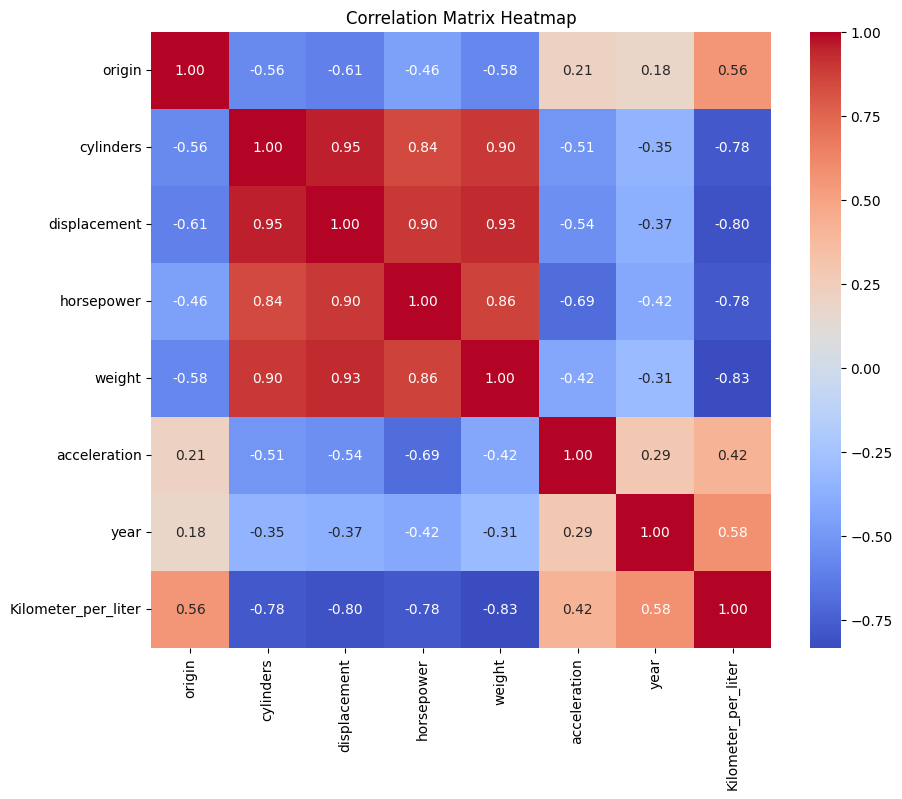

In [33]:
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

As we previously infered from the scatterplots we find negative correlations between:
* weight and kmpl
* cylinders and kmpl
* displacement and kmpl
<br> on an unrelated note, we find that weight and horsepower are also correlated, but that is not of any relevance to our problem statement

# LINEAR REGRESSION

The following are the steps of Linear Regression:
1. Split the independent variables to x and independent variable to y
2. split data into train and test set in such a way that 80% goes to the training set and 20% is assigned to the testing set
3. Initialise the Linear Regression Model and train it on the train sets
4. Make prediction on the test set using the same model
5. Evaluate and make predictions

In [35]:
#splitting data
X = data[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']]
y = data['Kilometer_per_liter']

In [42]:
from sklearn.impute import SimpleImputer

# Impute missing values with mean
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

In [43]:
# Split the imputed data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

In [44]:
# Initialize the linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)


LinearRegression()

Now we proceed with the testing

In [46]:
y_pred = model.predict(X_test)

In [50]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

Mean Squared Error: 2.651068768045227
R2 Score: 0.7272038917065149


The relatively low Mean Squared Error and moderately high r2 score signifies that that model performs reasonably well

# Conclusion
Based on the performance metrics and negative correlations observed between certain features and vehicle performance (mileage, kmpl), we can draw the following conclusions:<br>

Model Performance:<br>
* The linear regression model demonstrates moderate performance in predicting vehicle performance, as indicated by a Mean Squared Error (MSE) of approximately 2.65 and an R-squared (R2) score of around 0.73. While the model captures a substantial portion of the variability in mileage explained by the selected features, there is still room for improvement.<br>
Negative Correlations: <br>
* The negative correlations observed between weight, cylinders, displacement, and vehicle performance (kmpl) suggest that these features have a detrimental effect on fuel efficiency.<br>
Weight: <br>
* Heavier vehicles tend to have lower mileage, which is intuitive as more massive vehicles require more fuel to move.<br>
Cylinders:<br>  
* Vehicles with a higher number of cylinders typically consume more fuel, resulting in lower mileage.<br>
Displacement: <br>
* Larger engine displacements are associated with higher fuel consumption, leading to reduced mileage.<br>

<br> <br>
These negative correlations highlight the importance of considering weight reduction, engine optimization, and cylinder count reduction in vehicle design and engineering processes. Strategies such as lightweight materials, aerodynamic design, and engine downsizing can be explored to improve fuel efficiency and increase mileage. <br> <br>
In summary, while the regression model provides valuable insights into the relationship between technical specifications and vehicle performance, addressing the negative correlations between weight, cylinders, displacement, and mileage is essential for achieving better fuel efficiency and optimizing overall vehicle performance.